In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NN_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,NaN,0.00,...,0.0,0.0,NaN,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,NaN,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,NaN,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,NaN,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,NaN,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,NaN,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,NaN,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,NaN,0.000,0.000,0.000,3.043,NaN,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,NaN,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,NaN,0.000,NaN,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	464
float64		column 2	526
float64		column 3	464
float64		column 4	522
float64		column 5	352
float64		column 6	613
float64		column 7	526
float64		column 8	526
float64		column 9	468
float64		column 10	584
float64		column 11	526
float64		column 12	410
float64		column 13	348
float64		column 14	464
float64		column 15	468
float64		column 16	435
float64		column 17	584
float64		column 18	493
float64		column 19	555
float64		column 20	468
float64		column 21	493
float64		column 22	348
float64		column 23	377
float64		column 24	468
float64		column 25	406
float64		column 26	323
float64		column 27	468
float64		column 28	406
float64		column 29	493
float64		column 30	497
float64		column 31	381
float64		column 32	526
float64		column 33	435
float64		column 34	464
float64		column 35	294
float64		column 36	497
float64		column 37	410
float64		column 38	352
float64		column 39	348
float64		column 40	464
float64		column 41	464
float64		column 42	522
float

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4133.000000,4071.000000,4133.000000,4075.000000,4245.000000,3984.000000,4071.000000,4071.000000,4129.000000,4013.000000,...,4104.000000,4249.000000,4104.000000,4274.000000,4046.000000,4162.00000,4071.000000,4017.00000,4046.000000,4162.000000
mean,0.098006,0.197716,0.266734,0.049193,0.294737,0.085620,0.104424,0.098890,0.085333,0.212440,...,0.030197,0.034432,0.134274,0.015957,0.259914,0.06884,0.034289,4.81137,49.605536,275.594185
std,0.302685,1.233459,0.484045,1.183734,0.635579,0.256841,0.374533,0.399065,0.276424,0.596884,...,0.253395,0.222457,0.260722,0.103594,0.836855,0.21622,0.300155,27.84890,196.304538,605.606041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.60000,6.000000,35.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.00000,0.000000,2.28000,15.000000,94.000000
75%,0.000000,0.000000,0.400000,0.000000,0.370000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.000000,0.000000,0.183000,0.000000,0.300500,0.04300,0.000000,3.68900,42.750000,260.000000
max,4.540000,14.280000,4.340000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,8.330000,4.187000,9.752000,4.081000,32.478000,5.30000,13.129000,1021.50000,9989.000000,15841.000000


<AxesSubplot:>

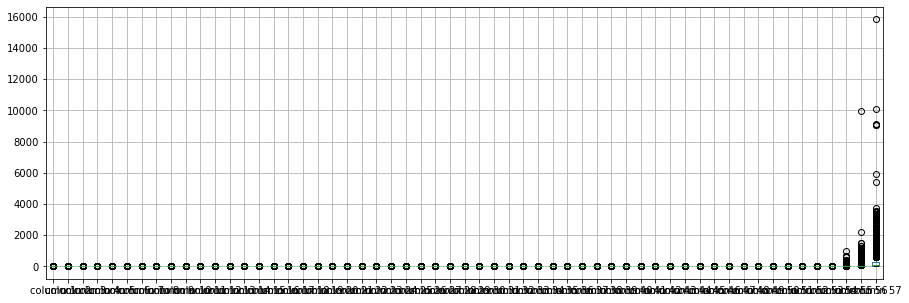

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.098006
column 2       0.197716
column 3       0.266734
column 4       0.049193
column 5       0.294737
column 6       0.085620
column 7       0.104424
column 8       0.098890
column 9       0.085333
column 10      0.212440
column 11      0.055640
column 12      0.523721
column 13      0.087839
column 14      0.053399
column 15      0.045042
column 16      0.231855
column 17      0.129277
column 18      0.166457
column 19      1.622496
column 20      0.080271
column 21      0.782332
column 22      0.112353
column 23      0.095547
column 24      0.086152
column 25      0.517354
column 26      0.241303
column 27      0.703953
column 28      0.113059
column 29      0.086109
column 30      0.094641
column 31      0.060598
column 32      0.043284
column 33      0.086937
column 34      0.040934
column 35      0.100957
column 36      0.090395
column 37      0.128572
column 38      0.011757
column 39      0.075999
column 40      0.059927
column 41      0.039528
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.013255,0.068404,0.006459,0.015929,0.051639,0.008495,-0.009051,0.092322,0.050983,...,-0.010353,-0.022337,-0.017865,-0.027889,0.049314,0.122756,-0.010396,0.038163,0.053734,0.076908
column 2,-0.013255,1.000000,-0.032199,-0.005870,-0.019000,-0.017533,0.013139,-0.016963,-0.001891,0.033751,...,-0.016017,-0.010275,-0.048364,-0.016192,-0.009532,-0.006820,-0.002680,-0.001628,0.002069,-0.016466
column 3,0.068404,-0.032199,1.000000,-0.009120,0.086648,0.084608,0.041740,0.006507,0.112359,0.041073,...,-0.027363,-0.030392,-0.019072,-0.029913,0.096583,0.107874,0.008741,0.129964,0.088407,0.075401
column 4,0.006459,-0.005870,-0.009120,1.000000,-0.007175,-0.005731,0.021208,-0.004822,0.004266,-0.001943,...,0.000049,0.001681,-0.010939,-0.006319,-0.002997,0.011131,-0.002753,0.004196,0.019357,0.015705
column 5,0.015929,-0.019000,0.086648,-0.007175,1.000000,0.060120,0.118225,0.029995,0.021124,0.032150,...,-0.034959,-0.034328,-0.047554,-0.021250,0.020303,0.059684,-0.007405,0.065829,0.035855,0.011100
column 6,0.051639,-0.017533,0.084608,-0.005731,0.060120,1.000000,0.053875,0.069009,0.118878,0.018530,...,-0.030793,-0.020099,-0.009320,-0.012806,0.044731,0.094064,0.043024,-0.009160,0.083721,0.087104
column 7,0.008495,0.013139,0.041740,0.021208,0.118225,0.053875,1.000000,0.050962,0.066177,0.054080,...,-0.030486,-0.033096,-0.051026,-0.027685,0.048488,0.078693,0.048478,0.050450,0.051080,0.000706
column 8,-0.009051,-0.016963,0.006507,-0.004822,0.029995,0.069009,0.050962,1.000000,0.089327,0.073333,...,-0.023103,-0.022097,-0.031848,-0.019758,0.023468,0.052076,-0.009016,0.016925,0.029041,0.041758
column 9,0.092322,-0.001891,0.112359,0.004266,0.021124,0.118878,0.066177,0.089327,1.000000,0.129983,...,-0.025168,-0.012656,-0.020655,0.025792,0.042619,0.144231,-0.005815,0.124998,0.155289,0.226608
column 10,0.050983,0.033751,0.041073,-0.001943,0.032150,0.018530,0.054080,0.073333,0.129983,1.000000,...,-0.026978,0.006429,0.000091,0.006868,0.032177,0.080278,0.023626,0.083709,0.090559,0.087644


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+20,17+20+20,17+20+20+20,17+20+20,17+20,17], vae_layer = False, seed = 200)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 589.4527033629734
Epoch: 1 , loss: 590.7347444009282
Epoch: 2 , loss: 591.5399601102291
Epoch: 3 , loss: 580.2358231228818
Epoch: 4 , loss: 584.4706845964704
Epoch: 5 , loss: 588.1214097185833
Epoch: 6 , loss: 589.6328119683349
Epoch: 7 , loss: 584.541396616228
Epoch: 8 , loss: 581.7499836778807
Epoch: 9 , loss: 583.6759620693088
Epoch: 10 , loss: 579.8800997850371
Epoch: 11 , loss: 570.9170072602062
Epoch: 12 , loss: 504.4094681424131
Epoch: 13 , loss: 473.97404222122884
Epoch: 14 , loss: 461.41080663594636
Epoch: 15 , loss: 456.5968352792986
Epoch: 16 , loss: 441.96817699791245
Epoch: 17 , loss: 439.05446273856876
Epoch: 18 , loss: 432.9514133572994
Epoch: 19 , loss: 448.14593412817976
Epoch: 20 , loss: 438.9731645484419
Epoch: 21 , loss: 426.7078582019341
Epoch: 22 , loss: 445.0652975421334
Epoch: 23 , loss: 441.2407706656107
Epoch: 24 , loss: 473.6850627141547
Epoch: 25 , loss: 443.6231352111604
Ep

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.000000
column 3      0.000000
column 4      0.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     0.000000
column 16     0.000000
column 17     0.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.000000
column 34     0.000000
column 35     0.000000
column 36     0.000000
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41    -0.006006
column 42     0.000000
column 43     0.000000
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.048735,0.000000,...,0.0,0.0,0.344749,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,0.000000,-0.231451,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,-0.448203,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,-0.106810,0.0,0.000000,0.0
4,0.000000,0.000000,0.0,0.0,-1.595042,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.106852,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
4593,0.000000,0.258020,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,-0.067267,0.000000,0.0,0.000000,0.0,6.886911,0.0
4594,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.127713,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.273241,0.0,-0.506562,0.0,0.000000,0.0
4595,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

14760.640130889922

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.31102104637429967

In [19]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.455409
column 3       0.890000
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.000000
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.121328
column 15      0.000000
column 16      0.246884
column 17     -0.212676
column 18      0.890000
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22      0.000000
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.000000
column 28      0.000000
column 29      0.000000
column 30      0.000000
column 31      0.000000
column 32      0.000000
column 33      0.000000
column 34      0.222868
column 35      0.000000
column 36      0.000000
column 37      0.354590
column 38      0.000000
column 39      0.000000
column 40      0.000000
column 41      0.000000
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.640000,0.64,0.0,0.320000,0.00,0.000000,0.00,0.048735,0.000000,...,0.0,0.0,0.344749,0.000000,0.778000,0.000,0.000000,3.756,61.000000,278.0
1,0.210000,0.048549,0.50,0.0,0.140000,0.28,0.210000,0.07,0.000000,0.940000,...,0.0,0.0,0.132000,0.000000,0.372000,0.180,0.048000,5.114,101.000000,1028.0
2,-0.448203,0.000000,0.00,0.0,0.630000,0.00,0.310000,0.63,0.310000,0.630000,...,0.0,0.0,0.135000,0.000000,0.135000,0.000,0.000000,3.537,40.000000,191.0
3,0.000000,0.000000,0.00,0.0,1.850000,0.00,0.000000,1.85,0.000000,0.000000,...,0.0,0.0,0.223000,0.000000,0.000000,0.000,-0.106810,3.000,15.000000,54.0
4,0.000000,0.000000,0.00,0.0,0.324958,0.00,0.000000,0.00,0.000000,0.640000,...,0.0,0.0,0.054000,0.000000,0.164000,0.054,0.000000,1.671,4.000000,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.000000,0.64,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.106852,...,0.0,0.0,0.348000,0.000000,1.160000,0.000,0.000000,3.121,15.000000,103.0
4593,0.000000,0.258020,0.00,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.000000,-0.067267,0.000000,0.000,0.000000,3.043,21.886911,70.0
4594,0.000000,0.000000,0.00,0.0,0.000000,0.00,0.127713,0.00,0.000000,0.000000,...,0.0,0.0,0.136000,0.000000,0.273241,0.000,-0.097562,1.837,12.000000,68.0
4595,0.170000,0.000000,0.68,0.0,0.340000,0.34,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.032000,0.000000,0.065000,0.000,0.000000,1.189,5.000000,69.0


In [21]:
imputations[-1].to_excel("Spam_NN_10(imp).xlsx", index=False, header=False)